<a href="https://colab.research.google.com/github/TashreefMuhammad/Kaggle_Titanic/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle: Titanic

This is an approach to solving the "Titanic" problem from the Kaggle competitions.

Competition Link: https://www.kaggle.com/c/titanic

# Importing Components

We start by importing components that are needed to code. Here we import,
1. CSV
2. Numpy
3. TensorFlow
4. Files (to manipulate files)

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

# Extracting Data

Next we upload required CSV files and extract data from the CSV files and store them in variables so that we can start doing calculations using them.

In [65]:
uploaded=files.upload()

Saving train.csv to train.csv


In [0]:
def get_data(filename):
    with open(filename) as training_file:
        labels = []
        features = []
        reader = csv.reader(training_file, delimiter=',') 
        
        next(reader, None)
        
        for row in reader:
            labels.append(row[1])
            # I will not be using all 12 given features as I don't see it useful (my opinion)
            # I will only use Ticket Class, Sex, Age, SibSp, Parch, Passenger Fare, Port of Embarkment
            # I will also convert all data to float type, so also changed some string words into a number representation
            features.append(np.array([row[2], 
                                      '1' if row[4] == 'male' else '2',
                                      row[5] if row[5] != '' else '0', 
                                      row[6], 
                                      row[7],
                                      row[9],
                                      '1' if row[11] == 'S' else '2' if row[11] == 'C' else '3']))
        labels = np.array(labels).astype(float)
        features = np.array(features).astype(float)
    return features, labels


features, labels = get_data('train.csv')

# Hence feature holds all the features I stored and labels hold whether the person survived or not.

# Divide the Data into Test and Validation

Next we divide the data into test and validation. As there are only 891 data, I will split them for now into 95% training and the remaining 5% into validation. The code is as below

So it divides into 846 data for training and 45 for testing

In [67]:
total_data = features.shape[0]
train_size = int(total_data * 0.95)
valid_size = total_data - train_size

training_data = np.zeros((train_size, features.shape[1]))
training_label = np.zeros((train_size, 1))
validation_data = np.zeros((valid_size, features.shape[1]))
validation_label = np.zeros((valid_size, 1))

for t in range (0, train_size):
  training_data[t, :] = features[t, :]
  training_label[t] = labels[t]

for t in range (train_size, total_data):
  validation_data[t - train_size, :] = features[t, :]
  validation_label[t - train_size] = labels[t]

print("Shape of input examples: "+ str(features.shape))
print("Shape of training data: "+ str(training.shape))
print("Shape of validation dta: "+ str(validation.shape))

Shape of input examples: (891, 7)
Shape of training data: (846, 7)
Shape of validation dta: (45, 7)


# Training

Now we train the model using our traing data.

In [94]:

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(training_data, training_label, epochs = 100, verbose = 2, validation_data = (validation_data, validation_label))

Epoch 1/100
27/27 - 0s - loss: 0.6715 - acc: 0.6312 - val_loss: 0.6953 - val_acc: 0.6222
Epoch 2/100
27/27 - 0s - loss: 0.6425 - acc: 0.6797 - val_loss: 0.5204 - val_acc: 0.7111
Epoch 3/100
27/27 - 0s - loss: 0.6155 - acc: 0.6939 - val_loss: 0.5237 - val_acc: 0.8000
Epoch 4/100
27/27 - 0s - loss: 0.6154 - acc: 0.6891 - val_loss: 0.4738 - val_acc: 0.8000
Epoch 5/100
27/27 - 0s - loss: 0.5650 - acc: 0.7175 - val_loss: 0.4567 - val_acc: 0.7778
Epoch 6/100
27/27 - 0s - loss: 0.5613 - acc: 0.7340 - val_loss: 0.4450 - val_acc: 0.7333
Epoch 7/100
27/27 - 0s - loss: 0.5177 - acc: 0.7435 - val_loss: 0.4240 - val_acc: 0.8222
Epoch 8/100
27/27 - 0s - loss: 0.5143 - acc: 0.7518 - val_loss: 0.4573 - val_acc: 0.8222
Epoch 9/100
27/27 - 0s - loss: 0.4957 - acc: 0.7660 - val_loss: 0.4104 - val_acc: 0.8667
Epoch 10/100
27/27 - 0s - loss: 0.5317 - acc: 0.7423 - val_loss: 0.4257 - val_acc: 0.7556
Epoch 11/100
27/27 - 0s - loss: 0.5442 - acc: 0.7435 - val_loss: 0.4000 - val_acc: 0.8222
Epoch 12/100
27/27 

# Plotting the Training

Plotting a graph to see how the training went

Text(0.5, 1.0, 'Training and validation loss')

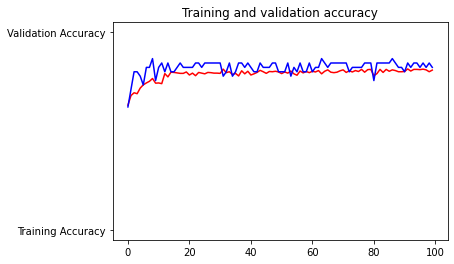

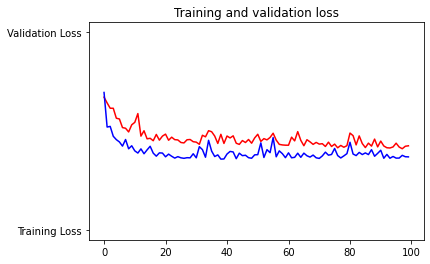

In [95]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Predicting Data

It is time to predict the data for totally unknown input features.
First we start with uploading and storing the features in a variable.

In [70]:
uploaded=files.upload()

Saving test.csv to test.csv


In [0]:
def get_test_data(filename):
    with open(filename) as training_file:
        features_test = []
        id_list = []
        reader = csv.reader(training_file, delimiter=',') 
        
        next(reader, None)
        
        for row in reader:
          # Storing the ID of Passengers to be used for later output
          id_list.append(row[0])
          # The test input column numbers vary, so in the new function, row index numbers will change
          # I will be cautious to ensure word to integer conversion remain in the same system as for 
          # training set for consistency
          features_test.append(np.array([row[1],
                                         '1' if row[3] == 'male' else '2', 
                                        row[4] if row[4] != '' else '0', 
                                        row[5], 
                                        row[6], 
                                        row[8] if row[8] != '' else '0',
                                        '1' if row[10] == 'S' else '2' if row[10] == 'C' else '3']))
        features_test = np.array(features_test).astype(float)
    return features_test, id_list


features_test, id_list = get_test_data('test.csv')

# Generating Prediction

Now to generate prediction of whether or not the person in question survived. We will predict it now.
The we will save it in a CSV file as our final output file.

In [0]:
prediction = model.predict(features_test)

with open('output.csv', 'w', newline = '\n') as file:
  writer = csv.writer(file)
  writer.writerow(["PassengerId", "Survived"])
  for t in range (0, len(id_list)):
    writer.writerow([id_list[t], "1" if prediction[t] > 0.5 else "0"])

# Result

The grader gave me a 0.74162 score for designing this very simple solution. Which means I got it 74% correct prediction in the test set.